In [1]:
import pandas as pd
import numpy as np

In [2]:
traindf = pd.read_csv('train.csv.zip',compression='zip')

In [3]:
testdf = pd.read_csv('test.csv.zip',compression='zip')

In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
traindf.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
traindf.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [7]:
testdf.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [8]:
testdf.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

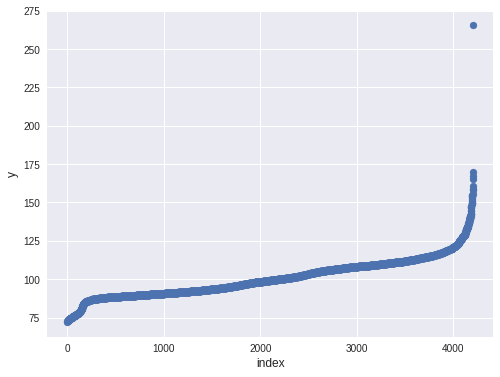

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(range(traindf.shape[0]),np.sort(traindf.y.values))
plt.xlabel('index',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.show()

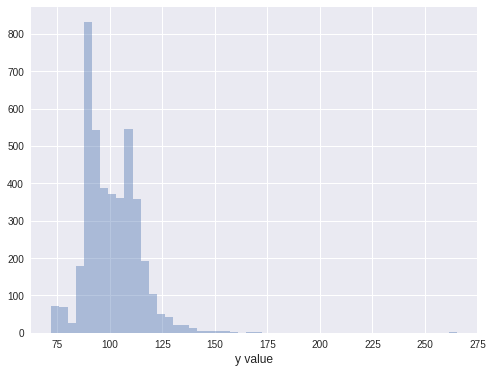

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(traindf.y.values,bins=50,kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

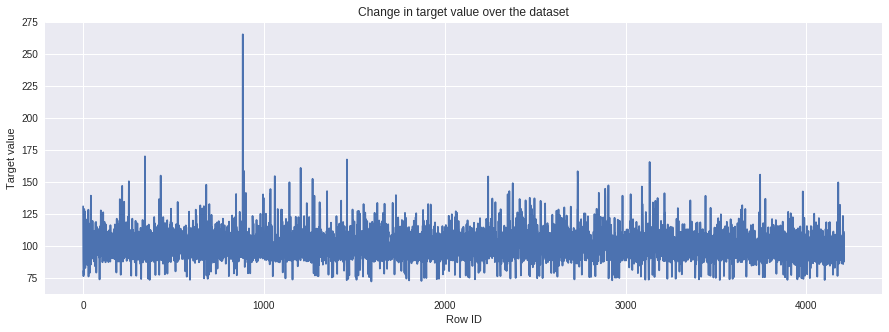

()


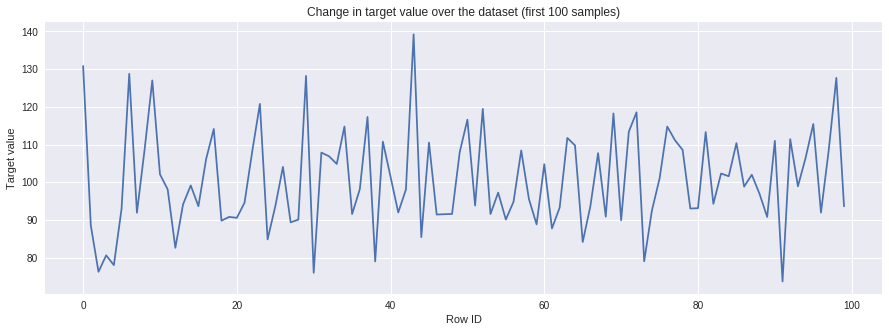

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(traindf.y)
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(traindf.y[:100])
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset (first 100 samples)')
print()

## Feature analysis

In [13]:
cols = [c for c in traindf.columns if 'X' in c]
print('Number of Features:{}'.format(len(cols)))

print('Feature types:')
traindf[cols].dtypes.value_counts()

Number of Features:376
Feature types:


int64     368
object      8
dtype: int64

In [14]:
unique_values_dict = {}
for col in traindf.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(traindf[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(len(columns))
    print("--------------------------------------------------")
        

('Columns containing the unique values : ', '[0, 1]')
356
--------------------------------------------------
('Columns containing the unique values : ', '[0]')
12
--------------------------------------------------


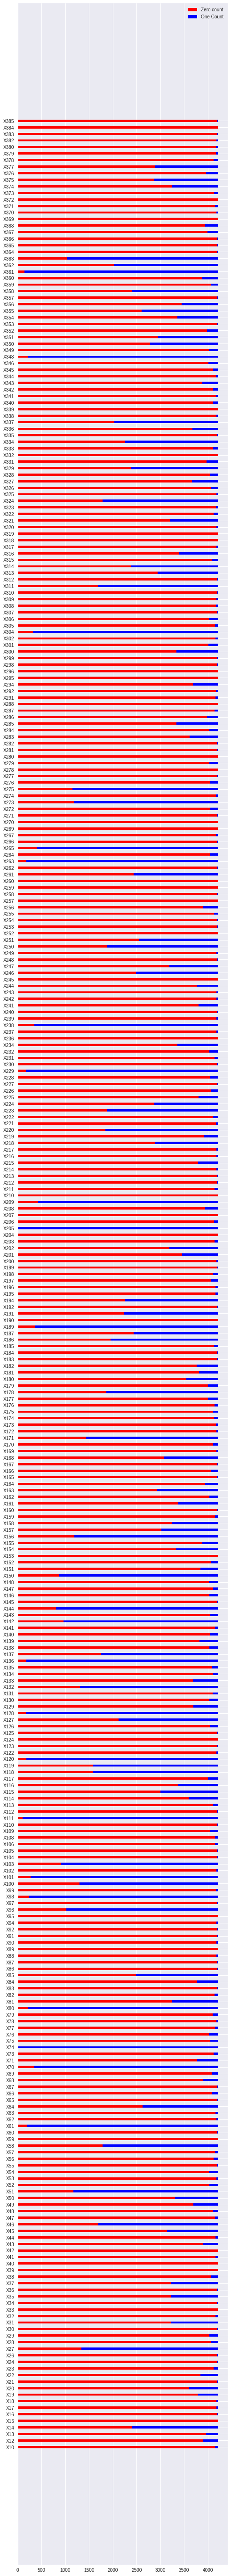

In [15]:
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((traindf[col]==0).sum())
    one_count_list.append((traindf[col]==1).sum())


N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(8,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

In [16]:
counts = [[], [], []]
for c in cols:
    typ = traindf[c].dtype
    uniq = len(np.unique(traindf[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))

print('Constant features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 12 Binary features: 356 Categorical features: 8

('Constant features:', ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'])
('Categorical features:', ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'])


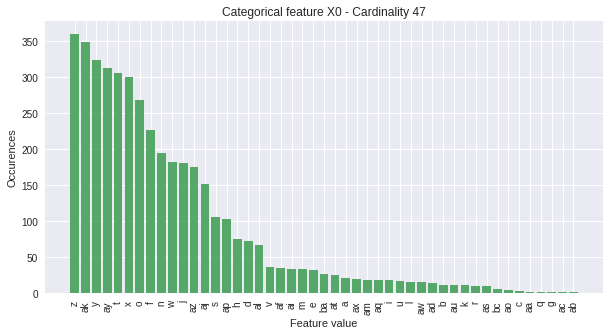

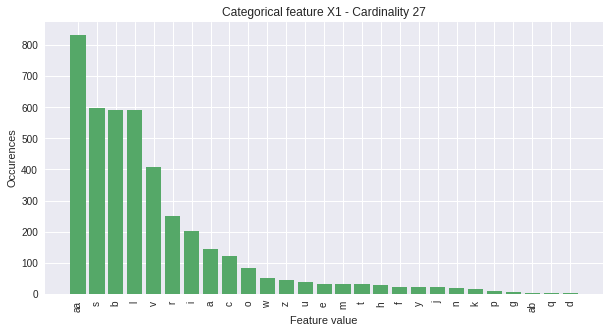

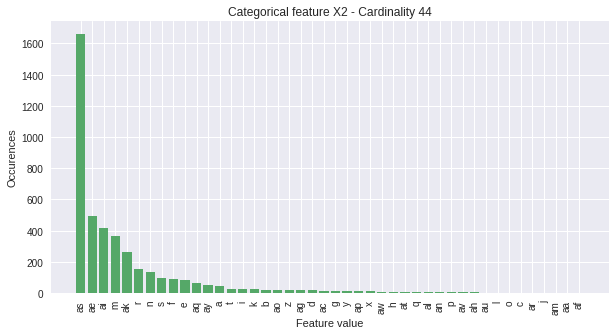

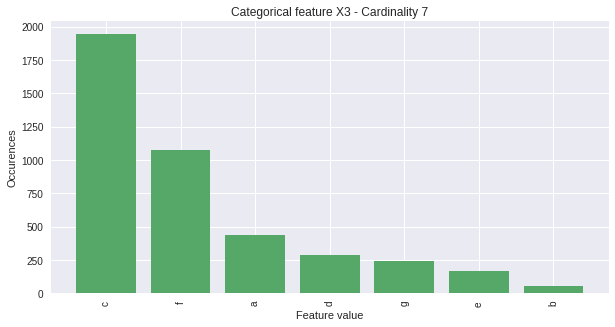

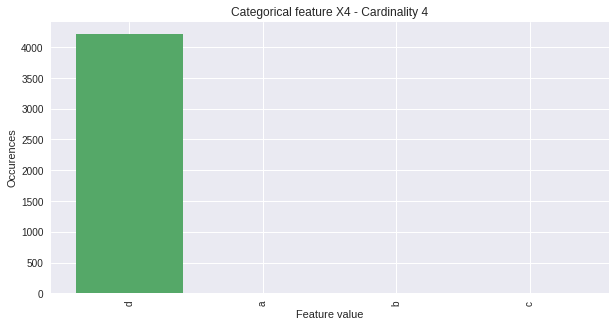

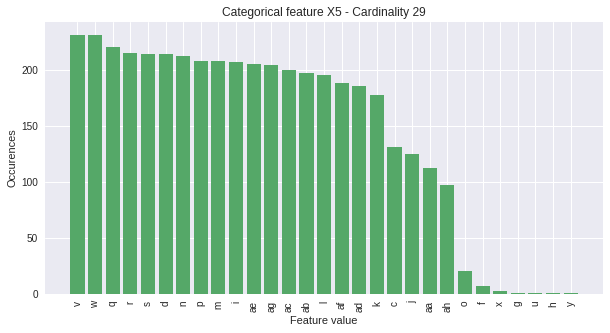

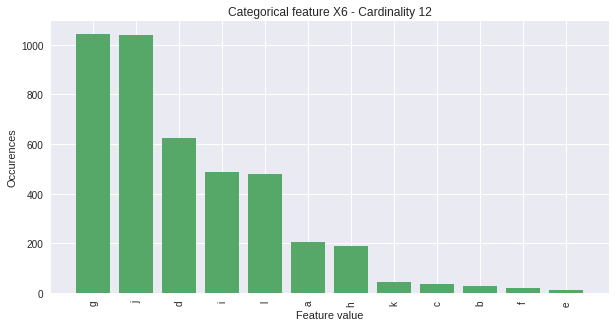

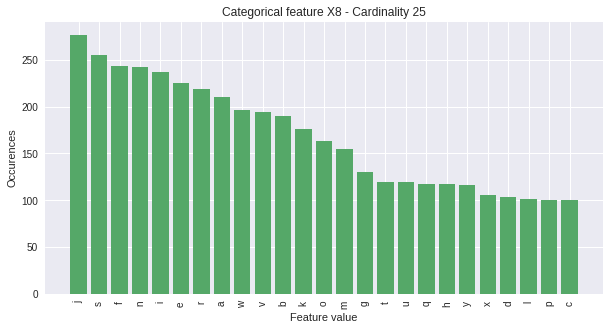

In [17]:
for c in counts[2]:
    value_counts = traindf[c].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('Categorical feature {} - Cardinality {}'.format(c, len(np.unique(traindf[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(value_counts)), value_counts.values, color=pal[1])
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')
    plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [19]:
train, _ = number_encode_features(traindf)

In [20]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y = traindf['y'].values
y

array([ 130.81,   88.53,   76.26, ...,  109.22,   87.48,  110.85])

In [22]:
X = train.iloc[:,2:].values
X.shape

(4209, 376)

In [23]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

/home/greyatom/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=4242)

# testset

In [25]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [26]:
test, _ = number_encode_features(testdf)

In [27]:
test.drop('ID',axis=1,inplace=True)
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
test= test.values

In [29]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 
                1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-r2:-58.3426	valid-r2:-67.6247
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-r2:-38.7928	valid-r2:-44.804
[20]	train-r2:-25.7332	valid-r2:-29.5876
[30]	train-r2:-17.0092	valid-r2:-19.4459
[40]	train-r2:-11.1814	valid-r2:-12.6899
[50]	train-r2:-7.28831	valid-r2:-8.19158
[60]	train-r2:-4.68722	valid-r2:-5.19867
[70]	train-r2:-2.94878	valid-r2:-3.21158
[80]	train-r2:-1.78616	valid-r2:-1.89273
[90]	train-r2:-1.00815	valid-r2:-1.01856
[100]	train-r2:-0.486848	valid-r2:-0.440129
[110]	train-r2:-0.137389	valid-r2:-0.056829
[120]	train-r2:0.0972	valid-r2:0.195842
[130]	train-r2:0.255244	valid-r2:0.36162
[140]	train-r2:0.361672	valid-r2:0.469802
[150]	train-r2:0.433285	valid-r2:0.540801
[160]	train-r2:0.481903	valid-r2:0.58689
[170]	train-r2:0.515318	valid-r2:0.615904
[180]	train-r2:0.538416	valid-r2:0.634038
[190]	train-r2:0.553881	valid-r2:0.644967
[200]	train-r2:0.564681	valid-r

In [30]:
predicts = clf.predict(d_test)
predicts = pd.DataFrame(predicts)

In [31]:
predicts.to_csv('submit.csv')